In [ ]:
# a)
from keras.datasets import boston_housing

# Učitavanje podataka
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# b)
print("Train data shape:", train_data.shape)
print("Train targets shape:", train_targets.shape)
print("Test data shape:", test_data.shape)
print("Test targets shape:", test_targets.shape)

"""
Podaci za treniranje (train_data) imaju oblik (404, 13)
→ To znači da skup za treniranje sadrži 404 primjera, a svaki primjer ima 13 atributa (značajki).

Ciljne vrijednosti za treniranje (train_targets) imaju oblik (404,)
→ Svakom od 404 primjera pridružena je jedna vrijednost cijene kuće (u hiljadama dolara).

Podaci za testiranje (test_data) imaju oblik (102, 13)
→ Skup za testiranje sadrži 102 primjera, također sa 13 atributa.

Ciljne vrijednosti za testiranje (test_targets) imaju oblik (102,)
→ Svakom od 102 primjera pridružena je jedna vrijednost cijene kuće.

Ukupno atributa (značajki):
Skup podataka sadrži 13 atributa (značajki) koji opisuju različite karakteristike stambenih područja u Bostonu (npr. broj soba, nivo zagađenja, porez na nekretnine, itd.).
"""


Train data shape: (404, 13)
Train targets shape: (404,)
Test data shape: (102, 13)
Test targets shape: (102,)


In [ ]:
# c)
import numpy as np
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

# Kombinujemo sve podatke kako bismo prikazali ukupni opseg
all_data = np.concatenate((train_data, test_data), axis=0)
all_targets = np.concatenate((train_targets, test_targets), axis=0)

# Opseg za svaki atribut
print("Opseg vrijednosti za svaki atribut (značajku):\n")
for i in range(all_data.shape[1]):
    min_val = np.min(all_data[:, i])
    max_val = np.max(all_data[:, i])
    print(f"Atribut {i+1}: min = {min_val:.2f}, max = {max_val:.2f}")

# Opseg za ciljne vrijednosti (cijene kuća)
target_min = np.min(all_targets)
target_max = np.max(all_targets)
print("\nOpseg ciljne vrijednosti (cijene kuća):")
print(f"Min = {target_min:.2f}, Max = {target_max:.2f}")


Opseg vrijednosti za svaki atribut (značajku):

Atribut 1: min = 0.01, max = 88.98
Atribut 2: min = 0.00, max = 100.00
Atribut 3: min = 0.46, max = 27.74
Atribut 4: min = 0.00, max = 1.00
Atribut 5: min = 0.39, max = 0.87
Atribut 6: min = 3.56, max = 8.78
Atribut 7: min = 2.90, max = 100.00
Atribut 8: min = 1.13, max = 12.13
Atribut 9: min = 1.00, max = 24.00
Atribut 10: min = 187.00, max = 711.00
Atribut 11: min = 12.60, max = 22.00
Atribut 12: min = 0.32, max = 396.90
Atribut 13: min = 1.73, max = 37.97

Opseg ciljne vrijednosti (cijene kuća):
Min = 5.00, Max = 50.00


In [ ]:
# d)
from sklearn.preprocessing import MinMaxScaler
import numpy as np


# Inicijalizacija
scaler = MinMaxScaler()

# Treniranje skalera samo na trening podacima
scaler.fit(train_data)

# Skaliranje trening i test podataka koristeći isti scaler
train_data_scaled = scaler.transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Provjera rezultata
print("Prve 3 normalizirane instance trening skupa:\n", train_data_scaled[:3])


Prve 3 normalizirane instance trening skupa:
 [[1.37816304e-02 0.00000000e+00 2.81524927e-01 0.00000000e+00
  3.14814815e-01 4.99806352e-01 9.14521112e-01 2.97191228e-01
  1.30434783e-01 2.27533461e-01 8.93617021e-01 1.00000000e+00
  4.68818985e-01]
 [1.73654275e-04 8.25000000e-01 5.75513196e-02 0.00000000e+00
  6.17283951e-02 7.84082107e-01 1.31822863e-01 5.36536996e-01
  4.34782609e-02 3.05927342e-01 2.23404255e-01 9.96167230e-01
  3.80794702e-02]
 [5.49837765e-02 0.00000000e+00 6.46627566e-01 0.00000000e+00
  5.06172840e-01 2.72850503e-01 1.00000000e+00 2.11779933e-02
  1.00000000e+00 9.13957935e-01 8.08510638e-01 9.46089061e-01
  4.22185430e-02]]


In [ ]:
# e)
from tensorflow.keras import models, layers

def model_mreze():
    model = models.Sequential()

    # Prvi skriveni sloj: 64 neurona, relu aktivacija, ulazne dimenzije prema broju atributa (13)
    model.add(layers.Dense(64, activation='relu', input_shape=(13,)))

    # Drugi skriveni sloj: 64 neurona, relu aktivacija
    model.add(layers.Dense(64, activation='relu'))

    # Izlazni sloj: 1 neuron, bez aktivacijske funkcije
    model.add(layers.Dense(1))

    return model

In [ ]:
# f) komp modela
model = model_mreze()

model.compile(optimizer='adam', loss='mse',metrics=['mae']) # mean absolute error


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Zadnja vrijednost funkcije gubitka (MSE) na trening skupu: 3.1401
Zadnja vrijednost metrike MAE na trening skupu: 1.3583 (≈ $1358)


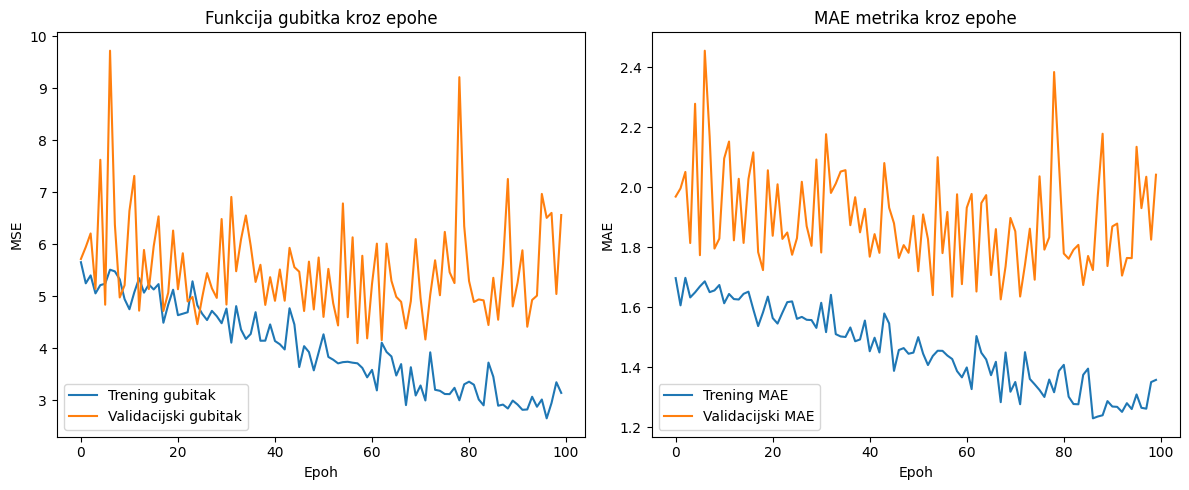

In [ ]:
# g) Treniranje modela
import matplotlib.pyplot as plt
from keras.datasets import boston_housing
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import models, layers

history = model.fit(train_data_scaled, train_targets,epochs=100,batch_size=1,validation_split=0.1,verbose=0)  # verbose=0 da ne ispisuje svaku epohu

#  Ispis krajnjih rezultata
final_loss = history.history['loss'][-1]
final_mae = history.history['mae'][-1]

print(f"Zadnja vrijednost funkcije gubitka (MSE) na trening skupu: {final_loss:.4f}")
print(f"Zadnja vrijednost metrike MAE na trening skupu: {final_mae:.4f} (≈ ${final_mae*1000:.0f})")

# Grafički prikaz
plt.figure(figsize=(12, 5))

# Loss kroz epohe
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Trening gubitak')
plt.plot(history.history['val_loss'], label='Validacijski gubitak')
plt.xlabel('Epoh')
plt.ylabel('MSE')
plt.title('Funkcija gubitka kroz epohe')
plt.legend()

# MAE kroz epohe
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Trening MAE')
plt.plot(history.history['val_mae'], label='Validacijski MAE')
plt.xlabel('Epoh')
plt.ylabel('MAE')
plt.title('MAE metrika kroz epohe')
plt.legend()

plt.tight_layout()
plt.show()

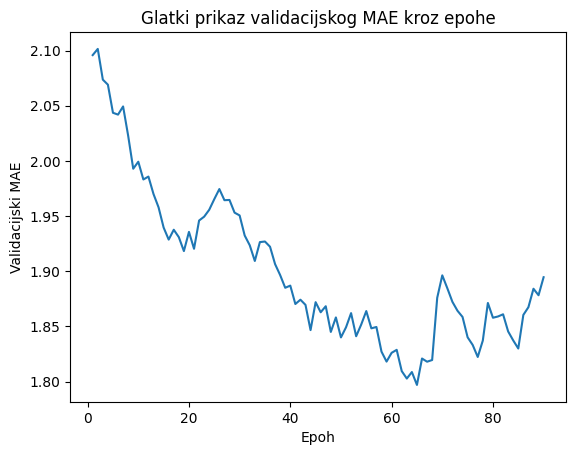

In [ ]:
# h)
import matplotlib.pyplot as plt
from keras.datasets import boston_housing
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import models, layers


def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

#  Glatki prikaz za validacijski MAE
mae_history = history.history['val_mae']
smooth_mae_history = smooth_curve(mae_history[10:])

# Prikaz grafika
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epoh')
plt.ylabel('Validacijski MAE')
plt.title('Glatki prikaz validacijskog MAE kroz epohe')
plt.show()

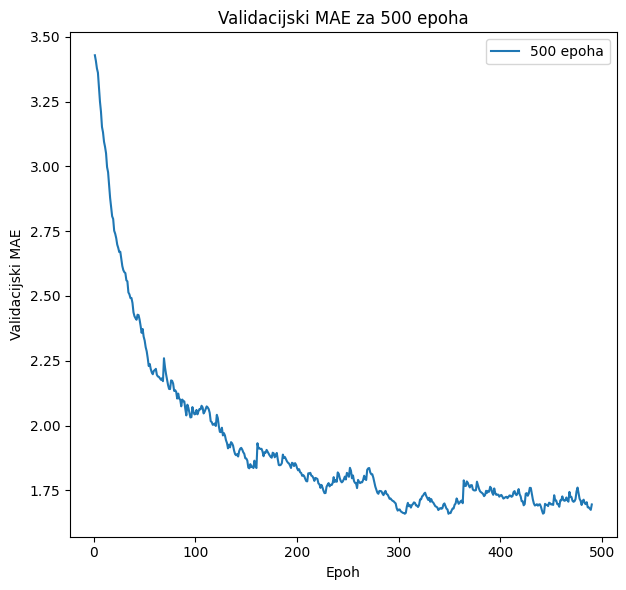

In [ ]:
# i)
# Treniranje modela na 500 epoha (drugi model)
import matplotlib.pyplot as plt
from keras.datasets import boston_housing
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import models, layers

model_500_epochs = model_mreze()
model_500_epochs.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_500 = model_500_epochs.fit(train_data_scaled, train_targets,
                                   epochs=500,
                                   batch_size=1,
                                   validation_split=0.1,
                                   verbose=0)

#  Glatki prikaz za validacijski MAE (500 epoha)
mae_history_500 = history_500.history['val_mae']
smooth_mae_history_500 = smooth_curve(mae_history_500[10:])

#  Grafički prikaz oba modela
plt.figure(figsize=(12, 6))

# # 100 epoha
# plt.subplot(1, 2, 1)
# plt.plot(range(1, len(smooth_mae_history_100) + 1), smooth_mae_history_100, label='100 epoha')
# plt.xlabel('Epoh')
# plt.ylabel('Validacijski MAE')
# plt.title('Validacijski MAE za 100 epoha')
# plt.legend()

# 500 epoha
plt.subplot(1, 2, 2)
plt.plot(range(1, len(smooth_mae_history_500) + 1), smooth_mae_history_500, label='500 epoha')
plt.xlabel('Epoh')
plt.ylabel('Validacijski MAE')
plt.title('Validacijski MAE za 500 epoha')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# j)
import matplotlib.pyplot as plt
from keras.datasets import boston_housing
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import models, layers
# Evaluacija modela na testnom skupu podataka
test_loss, test_mae = model_500_epochs.evaluate(test_data_scaled, test_targets)

# Ispis postignutih rezultata
print(f"Funkcija gubitka na testnom skupu: {test_loss}")
print(f"MAE na testnom skupu: {test_mae}")

# Prosječan broj dolara u grešci
mae_in_dollars = test_mae * 1000  # S obzirom da je u hiljadama dolara
print(f"Prosječna greška u dolarima: ${mae_in_dollars:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.5705 - mae: 1.9747  
Funkcija gubitka na testnom skupu: 13.60568618774414
MAE na testnom skupu: 2.198878049850464
Prosječna greška u dolarima: $2198.88
